# Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import cv2
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
import ipywidgets as widgets
import io
import os
import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns





# Data Preprocessing

In [45]:
"""x_train = []
y_train = []
img_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(img_size,img_size))
        x_train.append(img)
        y_train.append(i)

# Test data preprocessing
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(img_size,img_size))
        x_train.append(img)
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)"""

In [40]:
Y_train = []
X_train = []
labels = [ 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor' ]
image_size = 150
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        Y_train.append(i)
        X_train.append(img)
        
        
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        Y_train.append(i)
        X_train.append(img)
        
Y_train = np.array(Y_train)
X_train = np.array(X_train)

In [39]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)
X_train.shape

(2937, 150, 150, 3)

In [6]:
#Split the train and test data
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train= y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test= y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
#imort model
from keras.models import Sequential
from keras.layers import Dense, Activation

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
## Loss and Optimize
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [15]:
#Train model 
history = model.fit(X_train,y_train, epochs=20, validation_split = 0.1)


Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 312s 4s/step - accuracy: 0.2958 - loss: 2.4192 - val_accuracy: 0.2789 - val_loss: 1.3629
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 320s 4s/step - accuracy: 0.3791 - loss: 1.2803 - val_accuracy: 0.5680 - val_loss: 1.0162
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 323s 4s/step - accuracy: 0.5851 - loss: 0.9821 - val_accuracy: 0.5612 - val_loss: 0.9757
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 305s 4s/step - accuracy: 0.6264 - loss: 0.8617 - val_accuracy: 0.6769 - val_loss: 0.7634
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 306s 4s/step - accuracy: 0.6693 - loss: 0.7946 - val_accuracy: 0.6939 - val_loss: 0.6951
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 307s 4s/step - accuracy: 0.6841 - loss: 0.7189 - val_accuracy: 0.6803 - val_loss: 0.6948
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 316s 4s/step - accuracy: 0.7281 - loss: 0.6266 - val_accuracy: 0.7381 - val_loss: 0.5955
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 304s 4s/step - accuracy: 0.7746 - loss: 0.5345 - val_accuracy: 0.7211 - v

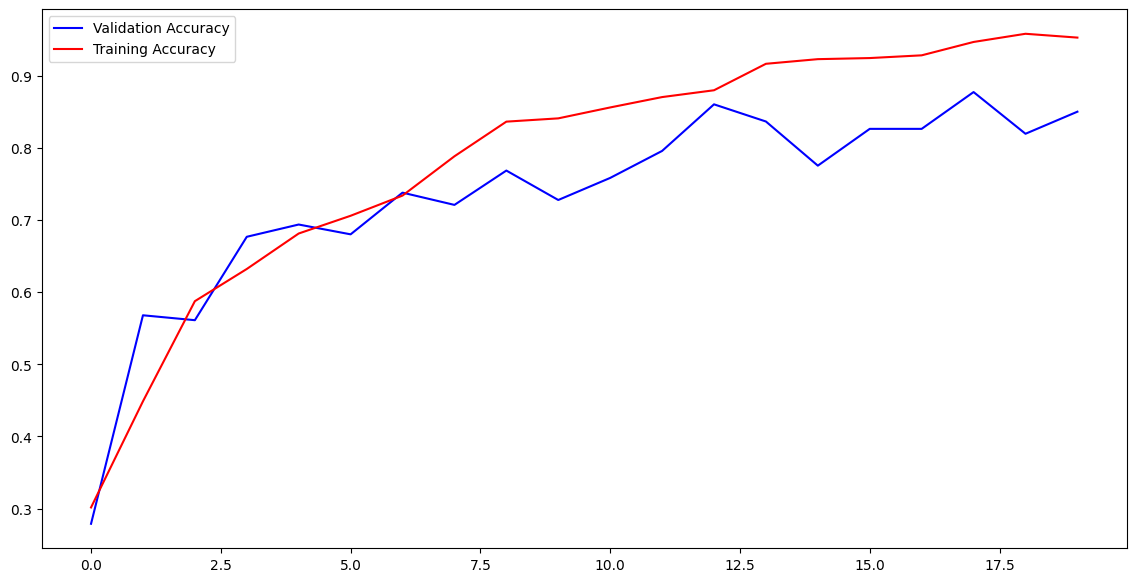

In [31]:
#plot the accuracy graph
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.legend()
plt.show()


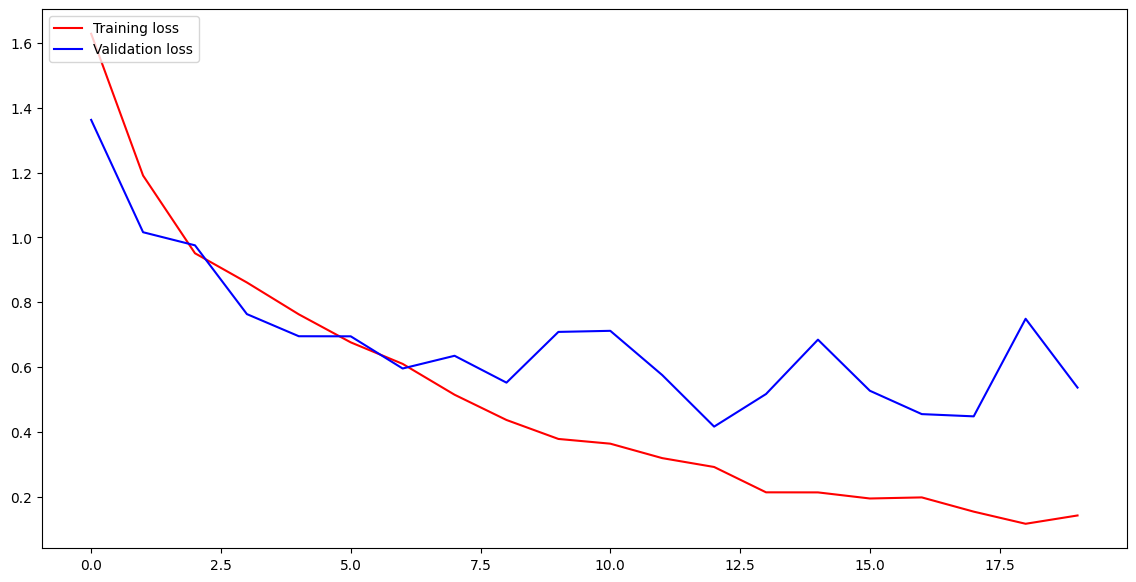

In [5]:
#plot the accuracy graph
val_loss = history.history['val_loss']
loss = history.history['loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,val_loss,'b',label = "Validation loss")
plt.plot(epochs,loss,'r',label = "Training loss")
plt.legend()
plt.show()

In [33]:
#take input and predict the result
image = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(112).jpg')
img = cv2.resize(image,(150,150))
img_array = np.array(img)
img_array = img_array.reshape(1,150,150,3)

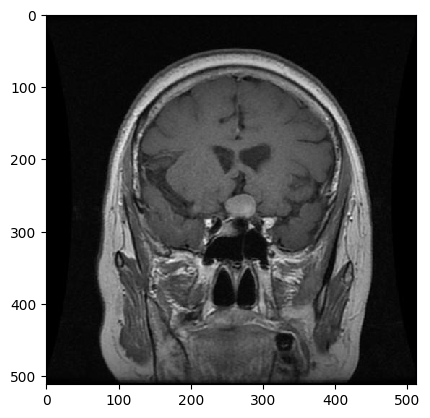

In [35]:
from tensorflow.keras.preprocessing import image
image = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (103).jpg')
plt.imshow(image,interpolation='nearest')
plt.show()

In [36]:
#Print the prediction
a=model.predict(img_array)
indices = a.argmax() ##find the maximam probability
print("The prediction is :", labels[indices])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The prediction is : meningioma_tumor
